In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np

In [ ]:
inputshape = (28,28,1)
inputs = Input(shape = inputshape)
x = inputs
x = Conv2D(32 , (3,3) , strides=2 , padding='same')(x)
x = LeakyReLU(alpha=0.2)(x)
x = BatchNormalization(axis = -1)(x)
x = Conv2D(64 , (3,3) , strides=2 , padding='same' )(x)
x = LeakyReLU(alpha=0.2)(x)
x = BatchNormalization(axis = -1)(x)



In [ ]:
x = Flatten()(x)
latent = Dense(10)(x)
encoder = Model(inputs , latent , name = 'encoder')

In [ ]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 7, 64)          0         
                                                           

In [ ]:
latentInputs = Input(shape=(10,))
volumeSize = (None,7,7,64)
x = Dense(np.prod(volumeSize[1:]))(latentInputs)
x = Reshape((volumeSize[1], volumeSize[2], volumeSize[3]))(x)
x = Conv2DTranspose(64, (3, 3), strides=2,padding="same")(x)
x = LeakyReLU(alpha=0.2)(x)
x = BatchNormalization(axis= -1)(x)
x = Conv2DTranspose(32, (3, 3), strides=2,padding="same")(x)
x = LeakyReLU(alpha=0.2)(x)
x = BatchNormalization(axis= -1)(x)
x = Conv2DTranspose(1, (3, 3), padding="same")(x)
outputs = Activation("sigmoid")(x)
decoder = Model(latentInputs, outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_1 (Dense)             (None, 3136)              34496     
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       36928     
 nspose)                                                         
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 batch_normalization_2 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                           

In [ ]:
autoencoder = Model(inputs, decoder(encoder(inputs)),name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 10)                50570     
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         90561     
                                                                 
Total params: 141,131
Trainable params: 140,747
Non-trainable params: 384
_________________________________________________________________


In [ ]:
from tensorflow.keras.datasets import fashion_mnist
((trainX, _), (testX, _)) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
print(trainX.shape)

(60000, 28, 28)


In [ ]:
# add a channel dimension to every image in the dataset, then scale
# the pixel intensities to the range [0, 1]
trainX = np.expand_dims(trainX, axis=-1)
testX = np.expand_dims(testX, axis=-1)
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0


In [ ]:
# sample noise from a random normal distribution centered at 0.5 (since
# our images lie in the range [0, 1]) and a standard deviation of 0.5
trainNoise = np.random.normal(loc=0.5, scale=0.5, size=trainX.shape)
testNoise = np.random.normal(loc=0.5, scale=0.5, size=testX.shape)
trainXNoisy = np.clip(trainX + trainNoise, 0, 1)
testXNoisy = np.clip(testX + testNoise, 0, 1)

In [ ]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
EPOCHS = 25
BS = 32
opt = Adam(lr=1e-3)
autoencoder.compile(loss="mse", optimizer=opt)
# train the convolutional autoencoder
history = autoencoder.fit(
	trainXNoisy, trainX,
	validation_data=(testXNoisy, testX),
	epochs=EPOCHS,
	batch_size=BS)

Epoch 1/25
1875/1875 [==============================] - 26s 7ms/step - loss: 0.0258 - val_loss: 0.0213
Epoch 2/25
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0207 - val_loss: 0.0204
Epoch 3/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0198 - val_loss: 0.0202
Epoch 4/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0193 - val_loss: 0.0198
Epoch 5/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0190 - val_loss: 0.0189
Epoch 6/25
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0187 - val_loss: 0.0191
Epoch 7/25
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0185 - val_loss: 0.0190
Epoch 8/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0183 - val_loss: 0.0185
Epoch 9/25
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0182 - val_loss: 0.0205
Epoch 10/25
1875/1875 [==============================] - 12s 6ms/step - l

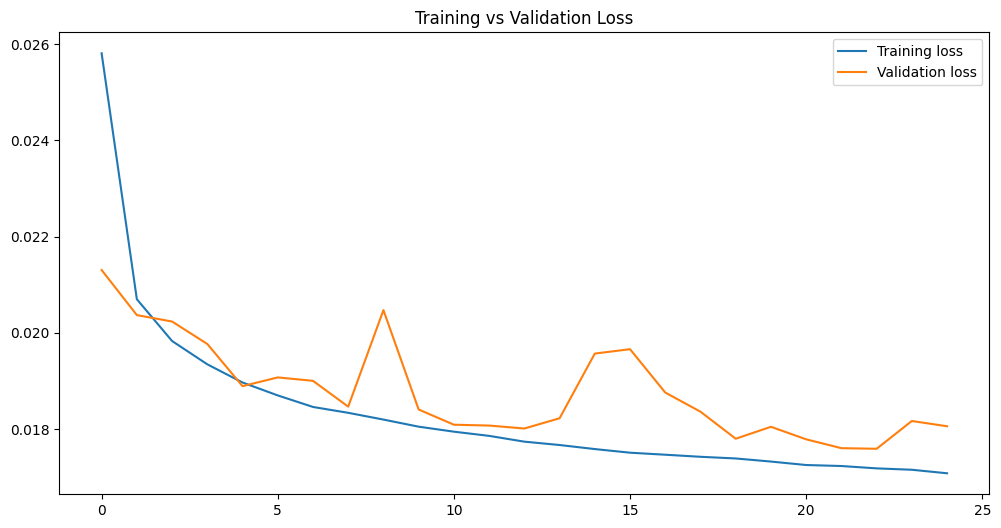

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

Let's Test

In [ ]:
# use the convolutional autoencoder to make predictions on the
# testing images, then initialize our list of output images
print("[INFO] making predictions...")
decoded = autoencoder.predict(testXNoisy)
outputs = None

[INFO] making predictions...
313/313 [==============================] - 1s 2ms/step


In [ ]:
# loop over our number of output samples
for i in range(0,8):
	# grab the original image and reconstructed image
	original = (testXNoisy[i] * 255).astype("uint8")
	recon = (decoded[i] * 255).astype("uint8")

	# stack the original and reconstructed image side-by-side
	output = np.hstack([original, recon])
 	# if the outputs array is empty, initialize it as the current
	# side-by-side image display
	if outputs is None:
		outputs = output

	# otherwise, vertically stack the outputs
	else:
		outputs = np.vstack([outputs, output])
import cv2
# save the outputs image to disk
cv2.imwrite("output.png", outputs)

True